In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_arbres_brut = pd.read_csv("p2-arbres-fr.csv", sep=";")

# Nouvelle section

In [3]:
df_travail=df_arbres_brut.copy()
df_travail.head()

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


In [4]:
# nombre de lignes et de colonnes du df_travail
df_travail.shape

(200137, 18)

<AxesSubplot:ylabel='None'>

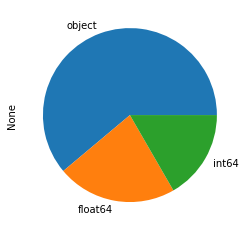

In [5]:
# diagramme circulaire des types de données du df_travail
df_travail.dtypes.value_counts().plot.pie()

<AxesSubplot:>

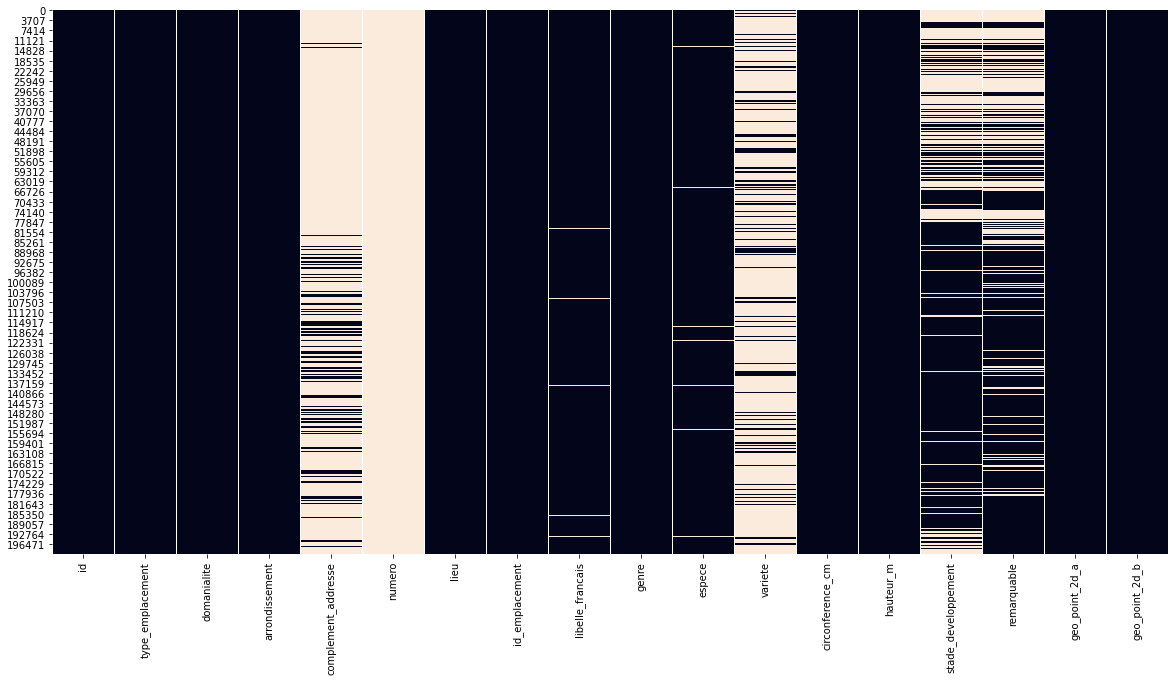

In [6]:
# cartographie des données manquantes
plt.figure(figsize=(20,10))
sns.heatmap(df_travail.isna(), cbar=False)

In [7]:
# Les colonnes de df_travail avec plus de 80% de données manquantes sont retirées et on crée un nouveau dataframe de travail
df_travail2=df_travail[df_travail.columns[(df_travail.isna().sum()/df_travail.shape[0])<0.8]]

<AxesSubplot:>

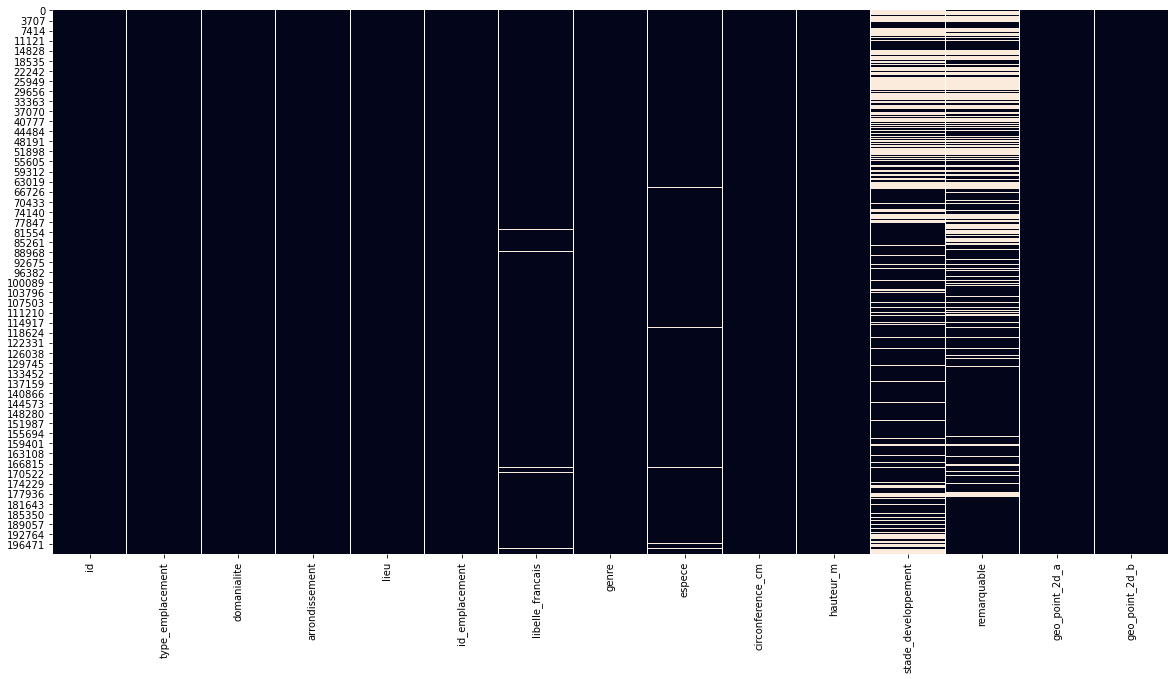

In [8]:
# Vérification des données manquantes du nouveau dataframe df_travail2
plt.figure(figsize=(20,10))
sns.heatmap(df_travail2.isna(), cbar=False)

In [9]:
# La colonne id est retirée car inutile
df_travail2 = df_travail2.drop('id', axis=1)
df_travail2.head()
df_travail2.shape

(200137, 14)

In [10]:
# résumé statistique de df_travail2
df_travail2.describe()

,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,200137.000000,200137.000000,137039.000000,200137.000000,200137.000000
mean,83.380479,13.110509,0.001343,48.854491,2.348208
std,673.190213,1971.217387,0.036618,0.030234,0.051220
min,0.000000,0.000000,0.000000,48.742290,2.210241
25%,30.000000,5.000000,0.000000,48.835021,2.307530
50%,70.000000,8.000000,0.000000,48.854162,2.351095
75%,115.000000,12.000000,0.000000,48.876447,2.386838
max,250255.000000,881818.000000,1.000000,48.911485,2.469759


In [11]:
# On continue avec le nouveau dataframe df_travail3
df_travail3=df_travail2.copy()
# retirer lignes avec circonference  nulle
df_travail3.drop(df_travail3[df_travail3['circonference_cm']==0].index, inplace=True)
# retirer lignes avec diamètre > 450 cm
df_travail3.drop(df_travail3[df_travail3['circonference_cm']>=450].index, inplace=True)
# retirer lignes avec hauteur nulle
df_travail3.drop(df_travail3[df_travail3['hauteur_m']==0].index, inplace=True)
# retirer lignes avec hauteur > 40 m
df_travail3.drop(df_travail3[df_travail3['hauteur_m']>=40].index, inplace=True)

In [12]:
df_travail3.shape

(159884, 14)

In [13]:
# résumé statistique de df_travail3
df_travail3.describe()

,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,159884.000000,159884.000000,127357.000000,159884.000000,159884.000000
mean,92.200070,10.356021,0.001201,48.855828,2.346148
std,57.934553,5.124012,0.034640,0.025864,0.049321
min,1.000000,1.000000,0.000000,48.742290,2.210416
25%,50.000000,6.000000,0.000000,48.836801,2.307588
50%,80.000000,10.000000,0.000000,48.855185,2.348759
75%,125.000000,14.000000,0.000000,48.874128,2.383184
max,449.000000,38.000000,1.000000,48.911485,2.469759


<AxesSubplot:xlabel='circonference_cm', ylabel='hauteur_m'>

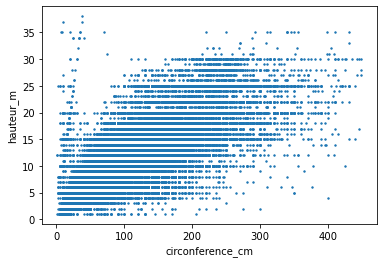

In [14]:
# nuage de points hauteur_m vs.  circonference_cm
df_travail3.plot.scatter('circonference_cm','hauteur_m', s=2)

<AxesSubplot:xlabel='hauteur_m', ylabel='circonference_cm'>

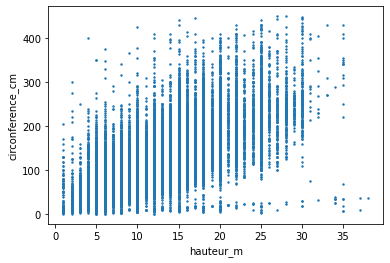

In [15]:
# nuage de points circonference_cm vs. hauteur_m
df_travail3.plot.scatter('hauteur_m','circonference_cm',s=2)

<AxesSubplot:ylabel='Frequency'>

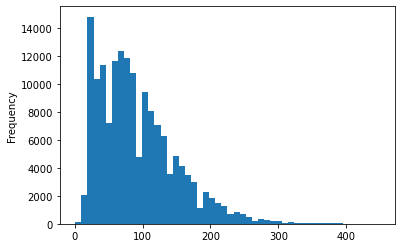

In [16]:
df_travail3['circonference_cm'].plot.hist(by='circonference_cm', bins=50)

<AxesSubplot:ylabel='Frequency'>

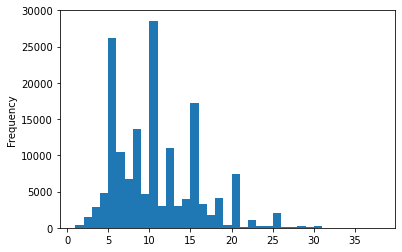

In [17]:
nb_de_hauteurs_differentes = df_travail3['hauteur_m'].nunique()
df_travail3['hauteur_m'].plot.hist(by='hauteur_m', bins=nb_de_hauteurs_differentes)

<AxesSubplot:xlabel='geo_point_2d_b', ylabel='geo_point_2d_a'>

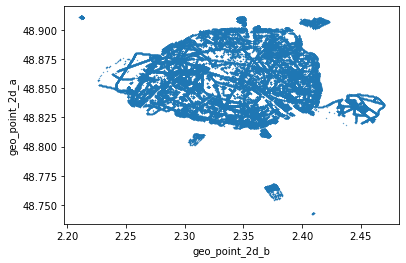

In [18]:
df_travail3.plot.scatter('geo_point_2d_b','geo_point_2d_a',s=0.1)

In [19]:
df_travail3.drop(df_travail3[df_travail3['geo_point_2d_a']<48.775].index, inplace=True)


<AxesSubplot:xlabel='geo_point_2d_b', ylabel='geo_point_2d_a'>

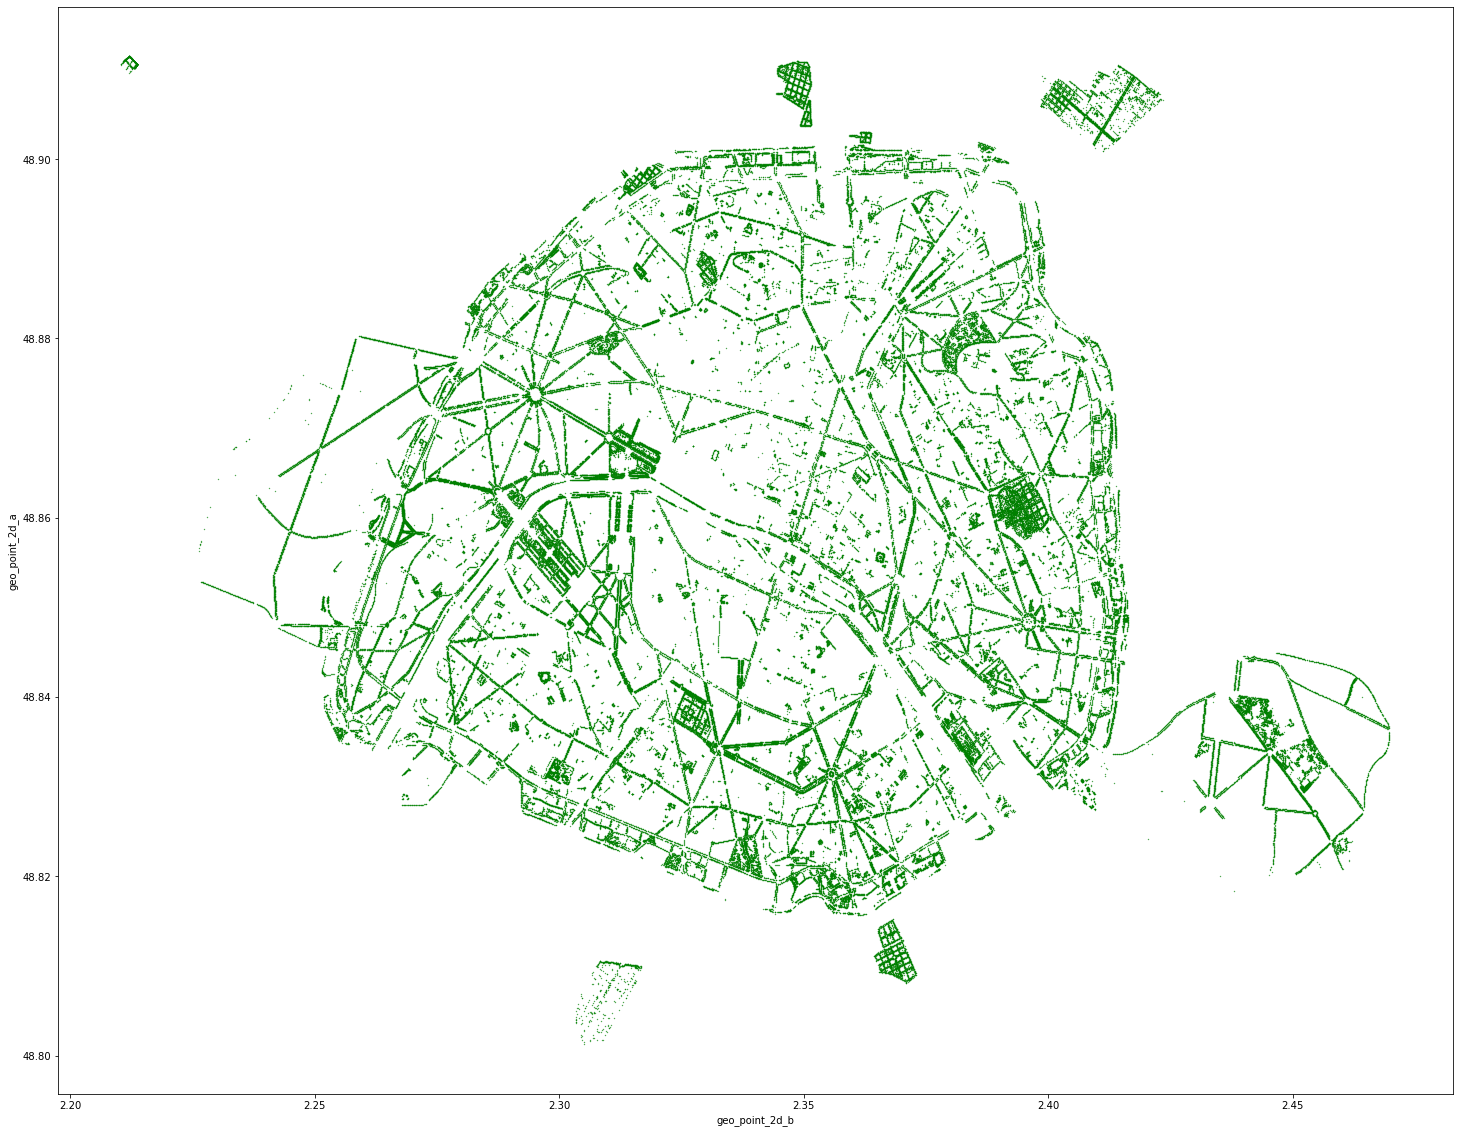

In [20]:
df_travail3.plot.scatter('geo_point_2d_b','geo_point_2d_a',s=0.1, figsize=(25,20), color="green")